<left>![alt](images/combined.png) 
# <font size="7">A gentle introduction to (physics informed) neural networks <font>
    

# <center>Dr. Jisha Chandroth Pannian
    
## <center>Institute of Applied Physics
 <font size="5"> <center>Friedrich Schiller University, Jena, Germany. <font>  **SPINONICS 889525**

    

# Motivation

<center> <img src="images/eu_ai.jpg" width="750" height="600" />

# Terminologies
<center> <img src="images/ai.png" width="1050" height="900" />

In [ ]:
John McCarthy - computer scientist, coined the word AI, developed lisp programming language, stanforduniv,
one of the founding fathers of AI, together with Alan Turing, Marvin Minsky, Allen Newell and Herbert Simon.
McCarthy, Minsky, Rochester and Shannon coined the term AI in a proposal for the Dartmouth conference in 1956.

# After the talk
<font size = "5">- you should be able to build your own artificial neural network for regression problems.
    
<font size = "5"> - Familiarization with python and tensorflow.
    
<font size = "5"> - Have a general idea about physics informed NN and
    
<font size = "5"> - whether or not you can use it in your own research. <font>

# Neural Network  - universal approximation theorem
<center> <img src="images/ffnn.png" width="550" height="600" />

In [ ]:
A neural network with one hidden layer containing a sufficient but finite number of neurons can approximate any continuous function
(to reasonable accuracy, for certain activation functions)
Formulated by George Cybenko in 1989

 <center> <video controls src="images/neuron.mp4" width="750" height="750"/>

## Single neuron
<center> <img src="images/neuron.png" width="650" height="600" />

<font size="5"> $y = \sum_{j=1}^{n} w_jx_j + b$, output value $= f(y)$ <font> 

# Example activation functions: Sigmoid, Rectified Linear Function (ReLu)

Sigmoid Function

Any function which has an S shape (its derivative is Bell shaped)

Example

Hyperbolic tangent

Logistic function


Text(0, 0.5, 'ReLU')

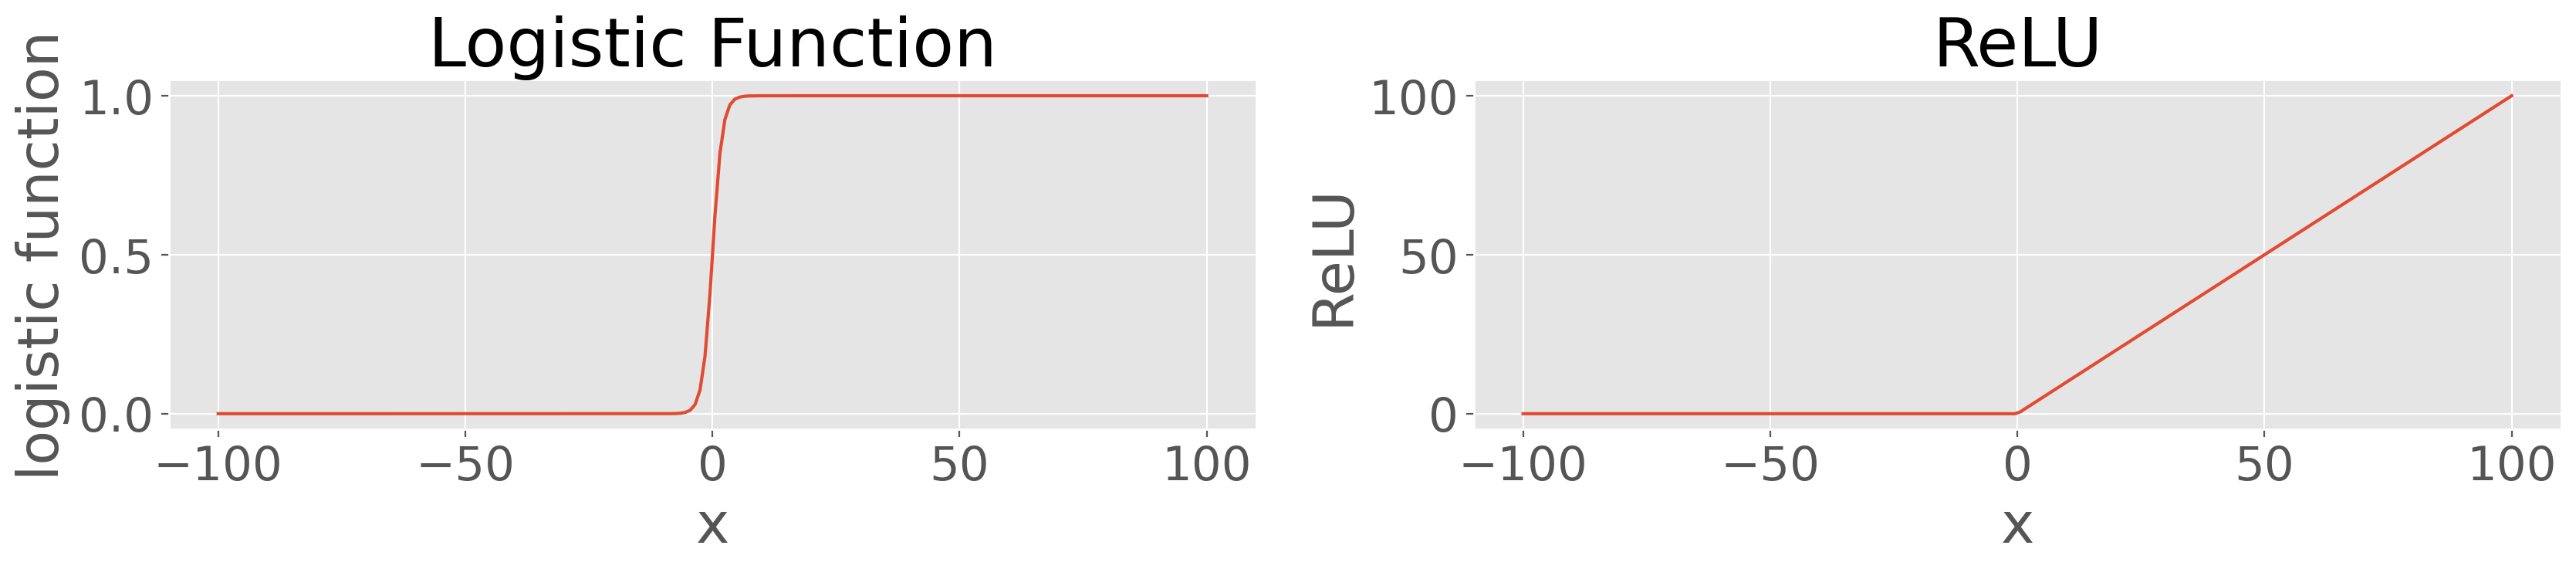

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=200 # highres display
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

x = np.linspace(-100,100, 200)
l  = 1/(1+ np.exp(-x))
plt.subplot(1,2,1)
plt.plot(x,logistic_fn)
plt.title('Logistic Function')
plt.xlabel("x")
plt.ylabel("logistic function")


plt.subplot(1,2,2)
ReLu = x.copy()

for i in range(len(x)):
    if x.item(i) <= 0:
        ReLu[i]=0
        
plt.plot(x,ReLu)
plt.title("ReLU")
plt.xlabel("x")
plt.ylabel("ReLU")

# Activation Function

<center> <img src="images/sigmoid.png" width="1500" height="1200" />

    
    

    

    
**In biology neurons fire after a threshold.**

# Build a simple neural network - model 1
- Data of the form $y=x^2$
- Neural network with 1 layer
- Regression problem

# 1. Collect and prepare the Data 

In [26]:
import tensorflow as tf # is from google or facebooks (meta) pytorch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi']=200 # highres display
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

import imageio
my_images = []

In [33]:
# Data Generation------

# Generating random data and add noise
# There will be ndata data points ranging from 0 to 50
ndata = 550
x = np.linspace(-50, 50, ndata)
 
# Adding noise to the random linear data
y=x**2/200 # + np.random.uniform(-4, 4, 550)#y**3/5000
  
n = len(x) # Number of data points

# slice out a small number of points from the LHS of the domain
x_data = x[0:550:10]
y_data = y[0:550:10]
print(x_data.shape, y_data.shape)

(55,) (55,)


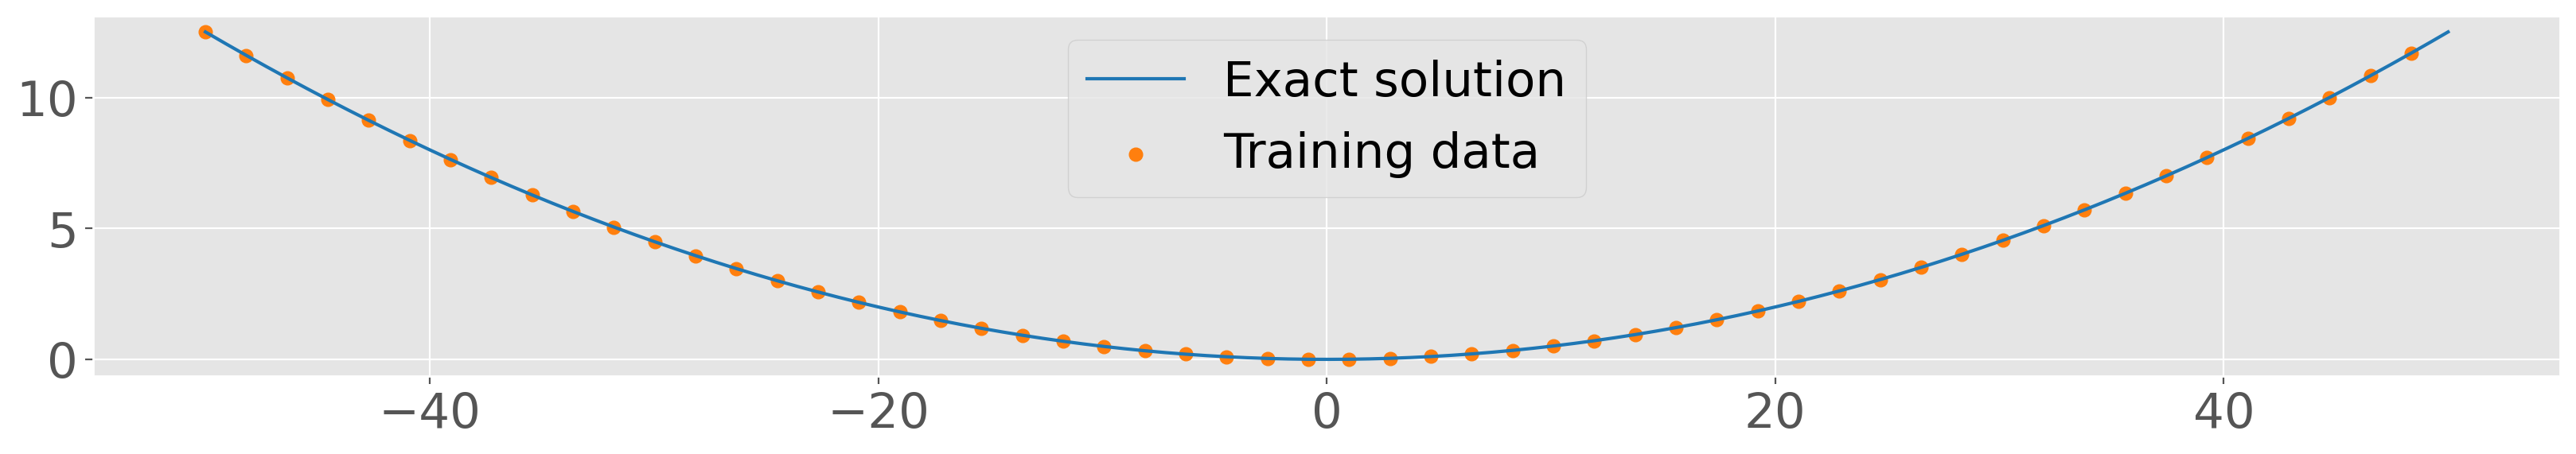

In [34]:
plt.figure()
plt.plot(x, x**2/200, color="tab:blue", label="Exact solution")
# plt.scatter(x, y, color="tab:blue", label="Collected data")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()

# 2. Define the model
```python
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape=[1])) # 1 input, 32 neurons
model1.add(tf.keras.layers.Dense(1)) # 1 output
```

# 3. Compile the model
```python
model1.compile(loss='mean_squared_error',
               optimizer=tf.keras.optimizers.Adam(1e-2))
model1.summary()
plot_model(model, 'model1.png', show_shapes=True)
```
<font size="5"> $MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$ <font> 


# Gradient Descent

<center> <img src="images/GradientDescent.svg" width="600" height="600" />
https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent

$w = w - lr \frac{\partial Loss}{\partial w}$

from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/lrs.svg'></td><td><img src='images/lrl.svg'></td><td><img src='images/lrr.svg'></td></tr></table>"))


# 3. Fit the model
```python
history = model1.fit(x_data, y_data, epochs=500,callbacks=[performance])
```

# 4. Evaluate the model
```python
error = model1.evaluate(X_test, y_test, verbose=0)
```

# 5. Predict using the model
```python
Ypredicted = model1.predict(X_predict)
```

In [36]:
class PerformancePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test,x,count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
   
    def on_epoch_end(self, epoch, logs={}):
        
        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x_test)
            
            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x_test, y_pred, alpha=0.6, 
                color='#FF0000', lw=1, ec='black')
            
            plt.scatter(self.x_test, self.y_test, alpha=0.1, 
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')
            
            

            plt.tight_layout()
            plt.title(f'Prediction Visualization - Epoch: {epoch}',fontsize=18)
            plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))
            
            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()

In [37]:
class PerformancePlotCallbackn(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test,x,count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
   
    def on_epoch_end(self, epoch, logs={}):
        
        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x)
            
            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x, y_pred, alpha=0.6, 
                color='#FF0000', lw=1, ec='black')
            
            plt.scatter(self.x_test, self.y_test, alpha=0.1, 
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])
            
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')
            
            

            plt.tight_layout()
            plt.title(f'Prediction Visualization  - Epoch: {epoch}',fontsize=18)
#             plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))
            
            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()

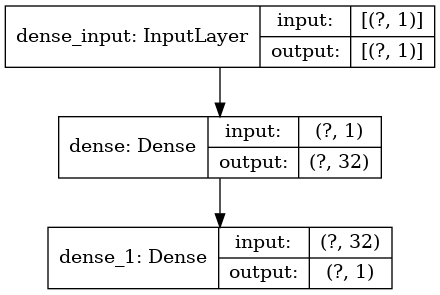

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model1, 'model.png', show_shapes=True)

In [38]:
import imageio
my_images = []
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape=[1]))
model1.add(tf.keras.layers.Dense(1))
model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model1.summary()
plot_model(model1, 'model.png', show_shapes=True)

# callback
performance = PerformancePlotCallback(x_data, y_data,x,0, "RegressionQ")
history = model1.fit(x_data, y_data, epochs=500,callbacks=[performance])
# save images as a gif     
imageio.mimsave('./para1.gif', my_images, fps=10)

  
            
           

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 1s 426ms/step - loss: 36.2776
Epoch 2/500
2/2 [==============================] - 0s 19ms/step - loss: 29.8209
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 35.2924
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 28.6011
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 27.9244
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3682
Epoch 7/500
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 14.5156
Epoch 196/500
2/2 [==============================] - 0s 2ms/step - loss: 14.0943
Epoch 197/500
2/2 [==============================] - 0s 3ms/step - loss: 14.4245
Epoch 198/500
2/2 [==============================] - 0s 3ms/step - loss: 14.3851
Epoch 199/500
2/2 [==============================] - 0s 4ms/step - loss: 14.0973
Epoch 200/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9932
Epoch 201/500
2/2 [==============================] - 0s 249ms/step - loss: 14.1852
Epoch 202/500
2/2 [==============================] - 0s 5ms/step - loss: 14.1666
Epoch 203/500
2/2 [==============================] - 0s 4ms/step - loss: 14.7104
Epoch 204/500
2/2 [==============================] - 0s 6ms/step - loss: 14.7842
Epoch 205/500
2/2 [==============================] - 0s 2ms/step - loss: 15.8152
Epoch 206/500
2/2 [==============================] - 0s 2ms/step - loss: 14.2712
Epoch 207/500
2/2 [=====================

2/2 [==============================] - 0s 4ms/step - loss: 13.9837
Epoch 396/500
2/2 [==============================] - 0s 6ms/step - loss: 14.4167
Epoch 397/500
2/2 [==============================] - 0s 10ms/step - loss: 14.1479
Epoch 398/500
2/2 [==============================] - 0s 6ms/step - loss: 14.3963
Epoch 399/500
2/2 [==============================] - 0s 8ms/step - loss: 14.5670
Epoch 400/500
2/2 [==============================] - 0s 2ms/step - loss: 14.0062
Epoch 401/500
2/2 [==============================] - 1s 266ms/step - loss: 13.9972
Epoch 402/500
2/2 [==============================] - 0s 3ms/step - loss: 13.9788
Epoch 403/500
2/2 [==============================] - 0s 6ms/step - loss: 14.3329
Epoch 404/500
2/2 [==============================] - 0s 8ms/step - loss: 14.0186
Epoch 405/500
2/2 [==============================] - 0s 4ms/step - loss: 14.1127
Epoch 406/500
2/2 [==============================] - 0s 6ms/step - loss: 14.0661
Epoch 407/500
2/2 [====================

[None, None, None, None, None, None]

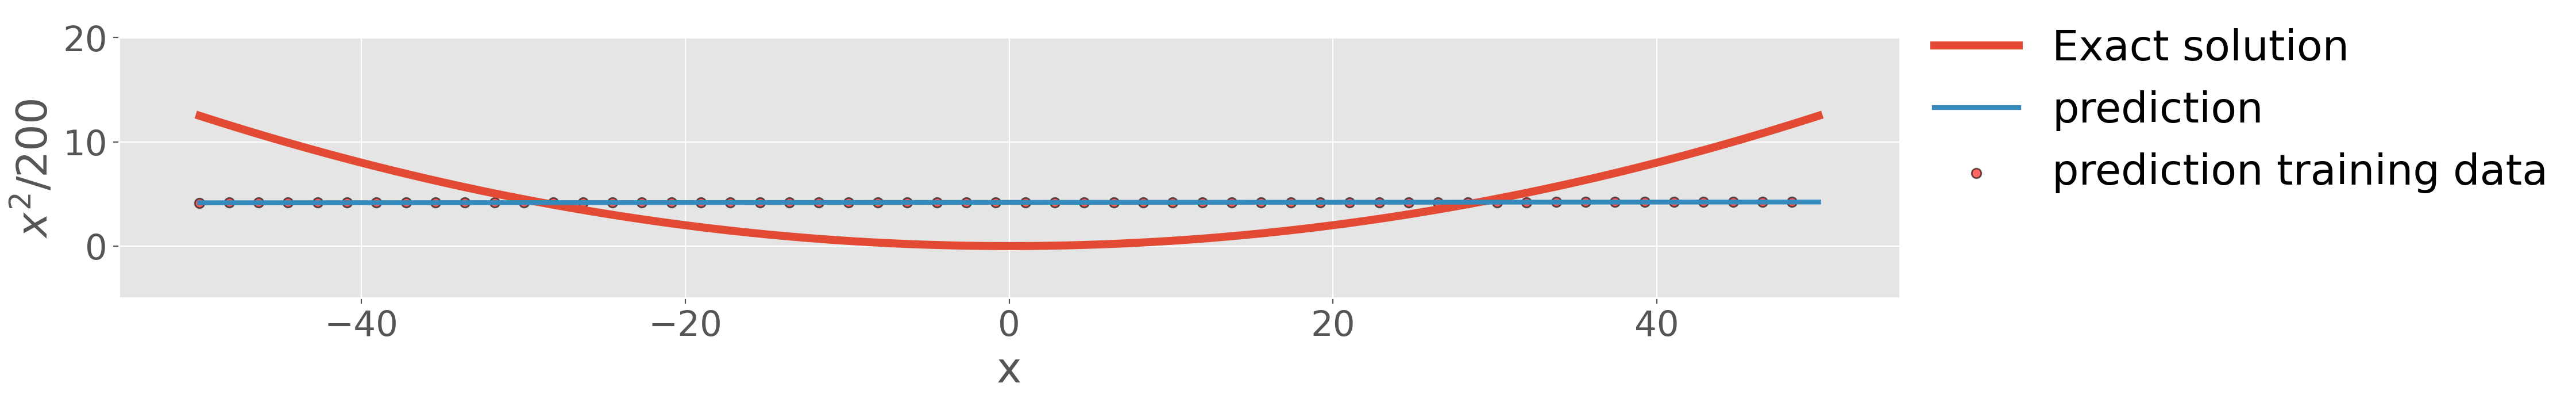

In [45]:
plt.figure()
# x_test = x[0:550:5]
# y_test = y[0:550:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model1.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model1.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

# Model 2

# Create a network with 1 input, 1 output and 2 hidden layers with 132 neurons
```python
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2.summary()
```

In [50]:
import imageio
my_images = []
# slice out a small number of points from the LHS of the domain
x_data = x[0:550:10]
y_data = y[0:550:10]
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")
history = model2.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance])
# save images as a gif    
imageio.mimsave('./para3.gif', my_images, fps=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 132)               264       
_________________________________________________________________
dense_11 (Dense)             (None, 132)               17556     
_________________________________________________________________
dense_12 (Dense)             (None, 132)               17556     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 133       
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
2/2 [==============================] - 1s 289ms/step - loss: 241.0540
Epoch 2/600
2/2 [==============================] - 0s 9ms/step - loss: 46.0448
Epoch 3/600
2/2 [==============================] - 0s 15ms/step - loss: 13.0047
Epoch 4

2/2 [==============================] - 0s 7ms/step - loss: 0.0750
Epoch 194/600
2/2 [==============================] - 0s 12ms/step - loss: 0.1031
Epoch 195/600
2/2 [==============================] - 0s 10ms/step - loss: 0.0572
Epoch 196/600
2/2 [==============================] - 0s 13ms/step - loss: 0.0847
Epoch 197/600
2/2 [==============================] - 0s 17ms/step - loss: 0.1304
Epoch 198/600
2/2 [==============================] - 0s 7ms/step - loss: 0.1261
Epoch 199/600
2/2 [==============================] - 0s 4ms/step - loss: 0.1480
Epoch 200/600
2/2 [==============================] - 0s 18ms/step - loss: 0.0775
Epoch 201/600
2/2 [==============================] - 0s 160ms/step - loss: 0.0466
Epoch 202/600
2/2 [==============================] - 0s 7ms/step - loss: 0.0818
Epoch 203/600
2/2 [==============================] - 0s 6ms/step - loss: 0.0407
Epoch 204/600
2/2 [==============================] - 0s 7ms/step - loss: 0.0194
Epoch 205/600
2/2 [============================

2/2 [==============================] - 0s 9ms/step - loss: 0.0372
Epoch 396/600
2/2 [==============================] - 0s 6ms/step - loss: 0.0411
Epoch 397/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0315
Epoch 398/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 399/600
2/2 [==============================] - 0s 15ms/step - loss: 0.0505
Epoch 400/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 401/600
2/2 [==============================] - 0s 176ms/step - loss: 0.0271
Epoch 402/600
2/2 [==============================] - 0s 7ms/step - loss: 0.0359
Epoch 403/600
2/2 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 404/600
2/2 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 405/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 406/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch 407/600
2/2 [==============================] 

Epoch 497/600
2/2 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 498/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 499/600
2/2 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 500/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 501/600
2/2 [==============================] - 0s 159ms/step - loss: 0.0063
Epoch 502/600
2/2 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 503/600
2/2 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 504/600
2/2 [==============================] - 0s 15ms/step - loss: 0.0034
Epoch 505/600
2/2 [==============================] - 0s 15ms/step - loss: 0.0093
Epoch 506/600
2/2 [==============================] - 0s 18ms/step - loss: 0.0105
Epoch 507/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 508/600
2/2 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 509/600
2/2 [==============

[None, None, None, None, None, None]

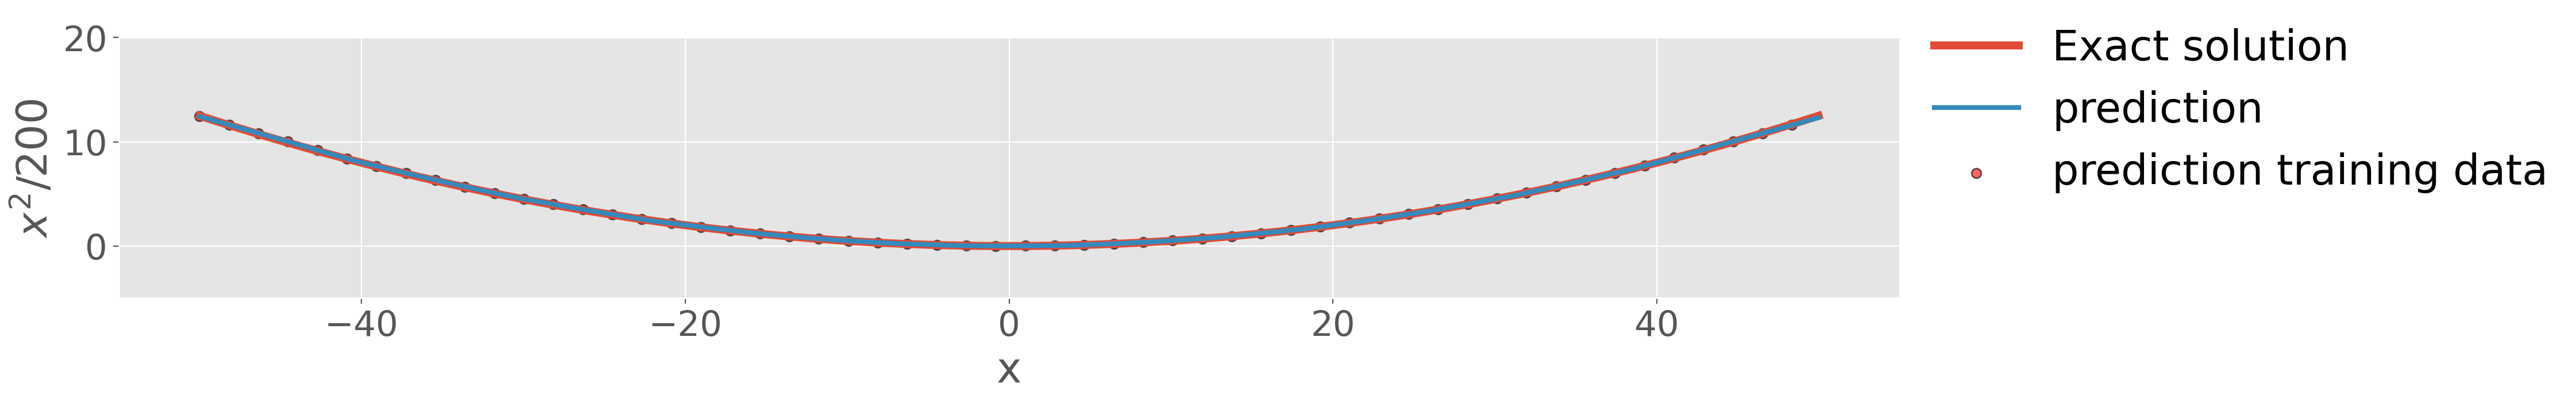

In [53]:
plt.figure()
x_data = x[0:550:10]
y_data = y[0:550:10]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model2.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

In [46]:
import imageio
my_images = []
# slice out a small number of points from the LHS of the domain
x_data = x[0:150:5]
y_data = y[0:150:5]
model2d = tf.keras.Sequential()
model2d.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(1))
model2d.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2d.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")
history = model2d.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance])
# save images as a gif    
imageio.mimsave('./para2.gif', my_images, fps=10)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 132)               264       
_________________________________________________________________
dense_7 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_8 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 133       
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
1/1 [==============================] - 1s 507ms/step - loss: 36.4484
Epoch 2/600
1/1 [==============================] - 0s 2ms/step - loss: 1214.9528
Epoch 3/600
1/1 [==============================] - 0s 3ms/step - loss: 53.0951
Epoch 4

1/1 [==============================] - 0s 5ms/step - loss: 1.6013
Epoch 94/600
1/1 [==============================] - 0s 4ms/step - loss: 1.5956
Epoch 95/600
1/1 [==============================] - 0s 4ms/step - loss: 1.5902
Epoch 96/600
1/1 [==============================] - 0s 5ms/step - loss: 1.5844
Epoch 97/600
1/1 [==============================] - 0s 4ms/step - loss: 1.5781
Epoch 98/600
1/1 [==============================] - 0s 2ms/step - loss: 1.5718
Epoch 99/600
1/1 [==============================] - 0s 4ms/step - loss: 1.5656
Epoch 100/600
1/1 [==============================] - 0s 5ms/step - loss: 1.5597
Epoch 101/600
1/1 [==============================] - 0s 339ms/step - loss: 1.5538
Epoch 102/600
1/1 [==============================] - 0s 2ms/step - loss: 1.5475
Epoch 103/600
1/1 [==============================] - 0s 2ms/step - loss: 1.5410
Epoch 104/600
1/1 [==============================] - 0s 2ms/step - loss: 1.5346
Epoch 105/600
1/1 [==============================] - 0s 2m

1/1 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 298/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 299/600
1/1 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 300/600
1/1 [==============================] - 0s 6ms/step - loss: 0.0646
Epoch 301/600
1/1 [==============================] - 0s 386ms/step - loss: 0.0641
Epoch 302/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 303/600
1/1 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 304/600
1/1 [==============================] - 0s 1ms/step - loss: 0.0622
Epoch 305/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 306/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 307/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 308/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 309/600
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 400/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 401/600
1/1 [==============================] - 0s 464ms/step - loss: 0.0290
Epoch 402/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 403/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 404/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 405/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 406/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 407/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 408/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 409/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 410/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 411/600
1/1 [==============================] -

[None, None, None, None, None, None]

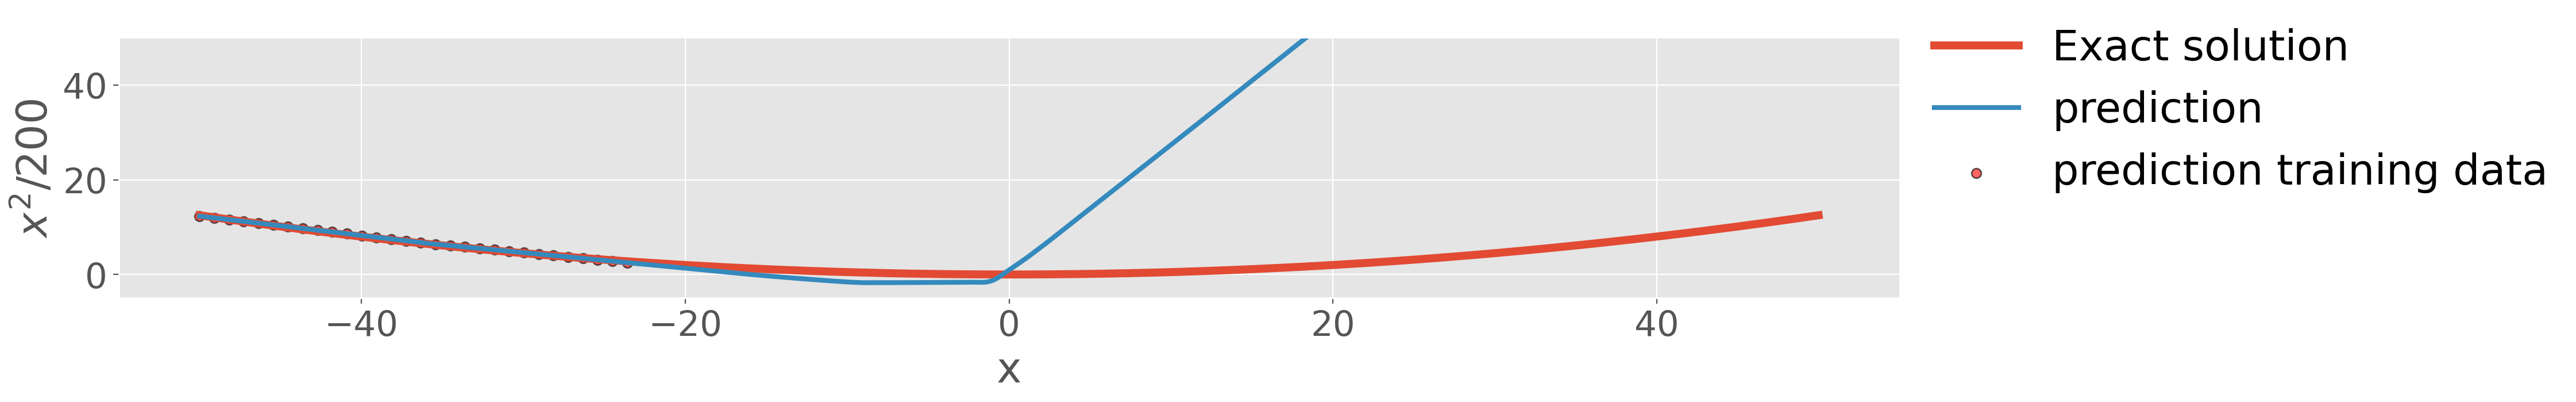

In [48]:
plt.figure()
x_data = x[0:150:5]
y_data = y[0:150:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

Text(0, 0.5, '$x^2/200$')

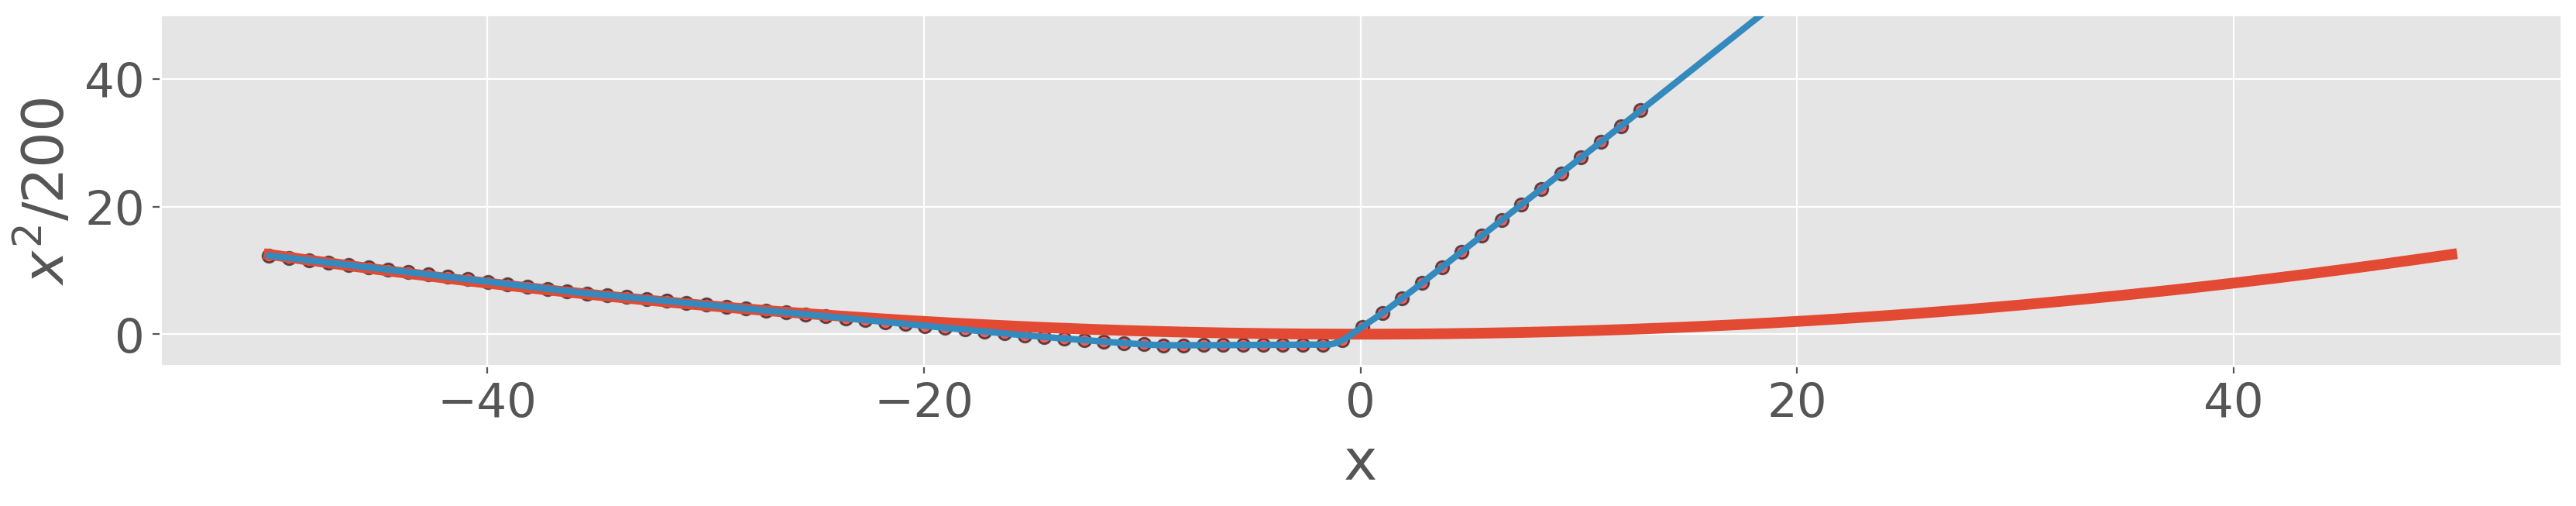

In [49]:
plt.figure()
x_data = x[0:350:5]
y_data = y[0:350:5]
plt.plot(x,x**2/200,lw=5)
plt.scatter(x_data, model2.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black')
            
plt.plot(x, model2.predict(x), lw=3)
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

In [69]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/para1.gif'></td><td><img src='images/para3.gif'></td><td><img src='images/para2.gif'></td></tr></table>"))


,,


# Model 3
## Physics informed neural network

# Automatic Differentiation

## <center> Dual Numbers

numbers of the form <center> $a + b \epsilon $, where 

<center> $\epsilon^2 =0$

# Automatic Differentiation
<center> $f(x) = x^2 + x +1$.
    
Evaluating $f(x+\epsilon)$ 
    <center> $f(x+\epsilon) = (x+\epsilon)^2 +(x+\epsilon) +1$
        <center> $f(x+\epsilon) = (x^2 + x +1) + (2x+1)\epsilon$
 ***
 $$f(x+\epsilon) = f(x) + f'(x)\epsilon$$

 ***
            
            
    


# How does AD work?
> Represent the function as a **computational graph** or Wengert List
 $y = x_1x_2 - sin(x_2)$

![](images/wengertList.png) <center>$x_1=2, x_2=3$


# The computation graph - forward pass
$v_1 = x_1 =2$

$v_2 = x_2 =3$

$v_3 = x_1x_2 = 2\cdot 3 =6$

$v_4 = sin(x_2) = -0.2794$

$v_5 = x_1x_2 - sin(x_2) = v_3 - v_4 = 6.2794$

# The computation graph -backward pass
partial derivatives of each node wrt its immediate inputs

$\frac{\partial v_5}{\partial v_4} = -1$
$\frac{\partial v_5}{\partial v_3} = 1$

$\frac{\partial v_4}{\partial v_2} = cos(x_2) = -0.989992$

$\frac{\partial v_3}{\partial v_1} = x_2 = 3$

Partial derivative at each node.

# Chain rule
$\frac{\partial f}{\partial x_1} = \frac{\partial f}{\partial v_1} = \frac{\partial f}{\partial v_3}\frac{\partial v_3}{\partial v_1}$

$\frac{\partial f}{\partial x_1} =\frac{\partial v_5}{\partial v_3}\frac{\partial v_3}{\partial v_1} = 1\cdot 3 = 3$

$\frac{\partial f}{\partial x_2} =\frac{\partial v_5}{\partial v_4}\frac{\partial v_4}{\partial v_2} = -1\cdot -0.989992 = 0.989992$

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [43]:
#x = np.linspace(-10,10,100)
x= tf.linspace(-10.0,10.0,101)

#y = np.sin(x)
#ytf = tf.convert_to_tensor(y, np.float32)
with tf.GradientTape() as tape:
    tape.watch(x)
    #y = tf.math.sin(x)
    y = tf.math.exp(-x**2/2)
dydxAD = tape.gradient(y,x)
#dydxAD

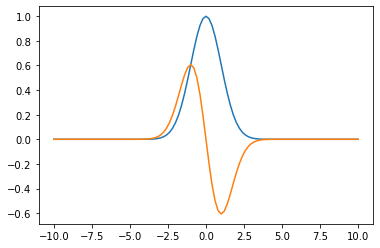

In [44]:
plt.plot(x,y)
plt.plot(x,dydxAD)

In [51]:
dydxAD[60]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.27067056>

In [20]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [67]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    with tf.GradientTape() as tape1:
        tape1.watch(x)
    #y = tf.math.sin(x)
        y =  tf.nn.sigmoid(x)
        y_x = tape1.gradient(y,x)
    #y = tf.math.sin(x)
    
yxx = tape.gradient(y_x,x)

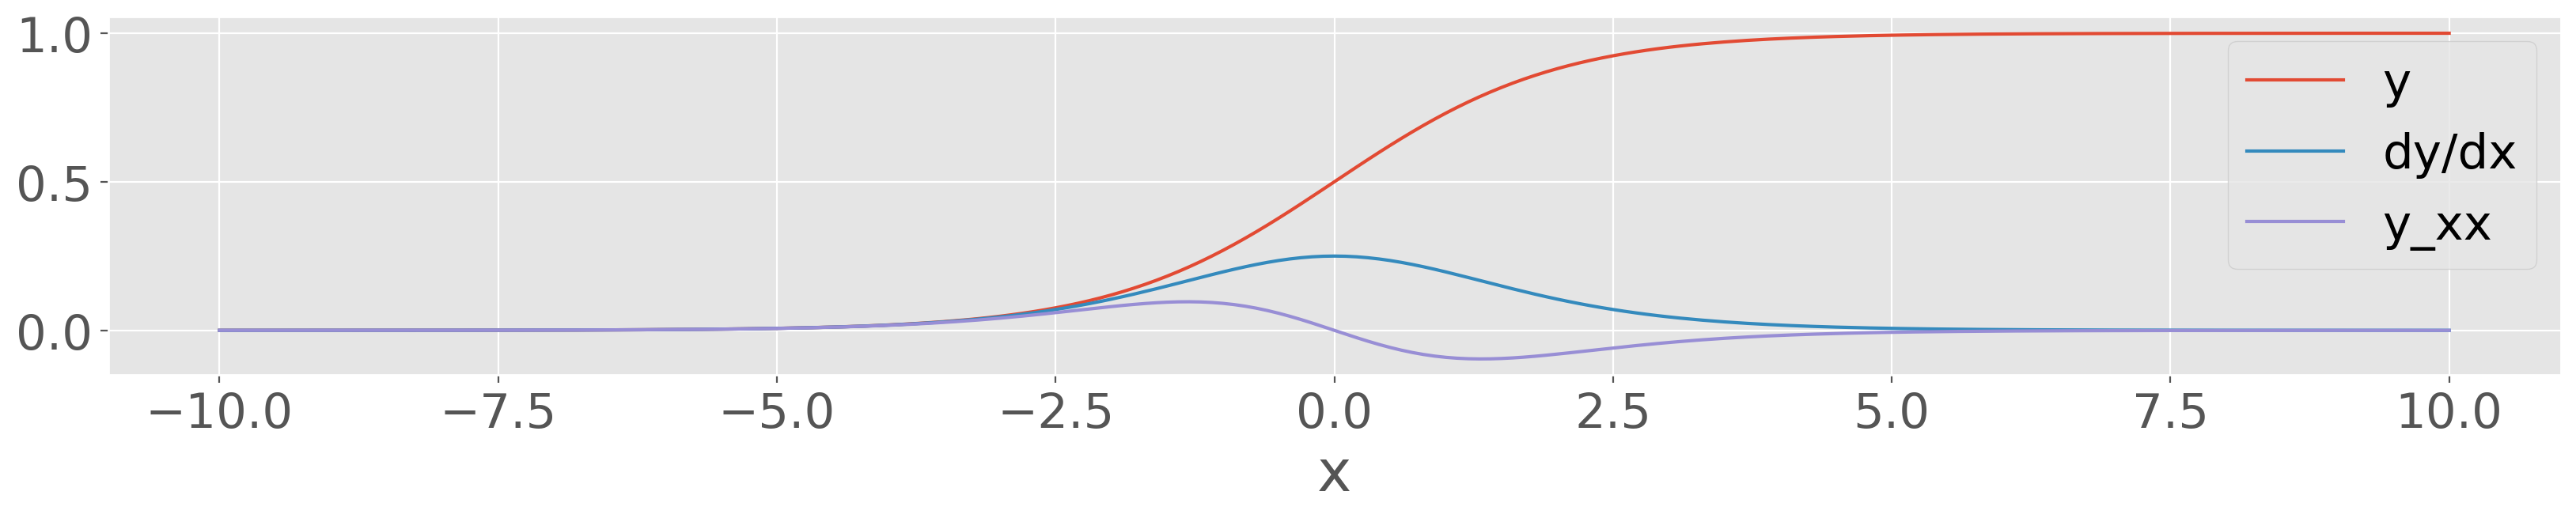

In [68]:
plt.plot(x, y, label='y')
plt.plot(x, y_x, label='dy/dx')
plt.plot(x, yxx, label='y_xx')
plt.legend()
_ = plt.xlabel('x')

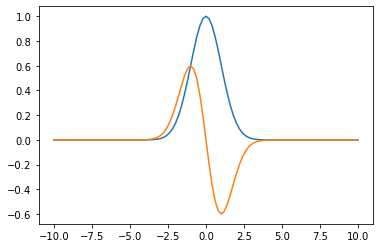

In [41]:
# numpy gradient
x = np.linspace(-10,10,101)
y = np.exp(-x**2/2)
y_x = np.gradient(y,x)
plt.plot(x,y)
plt.plot(x,y_x)

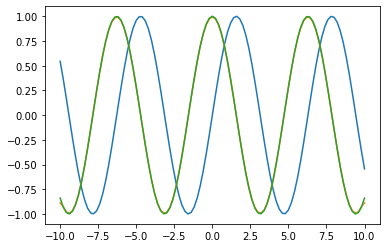

In [53]:
#x = np.linspace(-10,10,100)
xt= tf.linspace(-10.0,10.0,101)

#y = np.sin(x)
#ytf = tf.convert_to_tensor(y, np.float32)
with tf.GradientTape() as tape:
    tape.watch(xt)
    yt = tf.math.sin(xt)

dydxAD = tape.gradient(yt,xt)
#dydxAD

# numpy gradient
x = np.linspace(-10,10,101)
y = np.sin(x)
y_x = np.gradient(y,x)
plt.plot(x,y)
plt.plot(x,y_x)
plt.plot(xt,dydxAD)

In [72]:
import tensorflow as tf
print(tf.__version__)
# python versions.py # from terminal

2.2.0


# PINN - model 3
## Standard neural network

<center> <img src="images/nn.gif" width="750" height="650" />

https://benmoseley.blog/blog/


# Physics informed neural network
<center> <img src="images/pinn.gif" width="750" height="650" />
$m \frac{d^2x}{dt^2} + \mu \frac{dx}{dt} + k x=0$

<center> <img src="images/PINNSchematic.png" width="950" height="750" />

Karniadakis et.al, Natrevphys June 2021- Vol 3 Page 422


# Physics Informed Neural Networks

<center> <img src="images/USdoe.png" width="650" height="1250" />

# Nonlinear Schroedinger equation 
$iu_t +0.5u_{xx}+ |u|^2u=0$
<center> <img src="images/NLS.png" width="750" height="650" />
M Raissi, P Perdikaris, GE Karniadakis,    
Journal of Computational Physics 378, 686-707

# Hidden fluid dynamics
https://www.science.org/doi/10.1126/science.aaw4741#F2

<center> <img src="images/nspinn.jpeg" width="650" height="550" />

# PINN
<font size="4"> - A neural network which can be trained to solve supervised learning tasks \
-It respects the underlying laws of physics based on an ODE or PDE (linear or nonlinear) <font>

- can be used to infer solutions of PDE
- can also discover new PDE's
- some data, physics known 

M Raissi, P Perdikaris, GE Karniadakis,    
Journal of Computational Physics 378, 686-707

# Final Remarks

- Introduced artificial neural networks.
- Saw some simple examples as to how to use nn's for predictions.
- Automatic differentiation, double number
- Introduced PINN
- Physics infromed neural networks are becoming increasingly important in several scientific areas.
- NVIDIA and Ansys are already using PINN.

<center>  Thank you for listening! Questions? Comments?